# 손글씨 data 불러오기

In [9]:
from tensorflow.keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

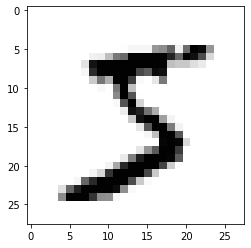

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap='Greys')
plt.show()

# 전처리

In [13]:
x_train_flat = []
for dat in x_train :
    x_train_flat.append(list(dat.flatten()))
x_train_flat = np.array(x_train_flat) / 255
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# One-hot encoding

In [14]:
import tensorflow as ft
y_enc = tf.keras.utils.to_categorical(y_train)
y_enc 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# 모델 학습

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(16,input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) 

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.fit(x_train_flat,y_enc,epochs = 100, batch_size = 100) 
print(model.evaluate(x_train_flat,y_enc))

Epoch 1/100
600/600 [==============================] - 1s 2ms/step - loss: 0.6053 - accuracy: 0.8292
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.9220
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2330 - accuracy: 0.9333
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.2106 - accuracy: 0.9398: 0s - loss: 0.2
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1960 - accuracy: 0.9430
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.9465: 
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1760 - accuracy: 0.9494
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1683 - accuracy: 0.9520
Epoch 9/100
600/600 [==============================] - 1s 2ms/step - loss: 0.1616 - accuracy: 0.9537
Epoch 10/100
600/600 [==============================] - 1s 2ms/step - los

600/600 [==============================] - 1s 1ms/step - loss: 0.0717 - accuracy: 0.9785
Epoch 82/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0715 - accuracy: 0.9786
Epoch 83/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0706 - accuracy: 0.9790
Epoch 84/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0704 - accuracy: 0.9796
Epoch 85/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0700 - accuracy: 0.9790
Epoch 86/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 87/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0695 - accuracy: 0.9791
Epoch 88/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0687 - accuracy: 0.9799
Epoch 89/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0680 - accuracy: 0.9800
Epoch 90/100
600/600 [==============================] - 1s 1ms/step - loss: 0.0679 - accuracy: 

# 복잡도 향상

In [17]:
model = Sequential()
model.add(Dense(512,input_dim = 784, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(10, activation = 'softmax')) #add를 추가할수록 히든레이어의 숫자는 작아져야 함
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.fit(x_train_flat,y_enc,epochs = 100, batch_size = 100) 
print(model.evaluate(x_train_flat,y_enc))

Epoch 1/100
600/600 [==============================] - 4s 7ms/step - loss: 0.3463 - accuracy: 0.8948
Epoch 2/100
600/600 [==============================] - 4s 7ms/step - loss: 0.1023 - accuracy: 0.9708
Epoch 3/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0735 - accuracy: 0.9787
Epoch 4/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0533 - accuracy: 0.9841
Epoch 5/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0435 - accuracy: 0.9868
Epoch 6/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 7/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 8/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 9/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 10/100
600/600 [==============================] - 4s 7ms/step - loss: 0.0184 - accura

600/600 [==============================] - 4s 7ms/step - loss: 1.5427e-08 - accuracy: 1.0000
Epoch 81/100
600/600 [==============================] - 4s 7ms/step - loss: 1.0737e-08 - accuracy: 1.0000
Epoch 82/100
600/600 [==============================] - 4s 7ms/step - loss: 7.8459e-09 - accuracy: 1.0000
Epoch 83/100
600/600 [==============================] - 4s 7ms/step - loss: 5.8074e-09 - accuracy: 1.0000
Epoch 84/100
600/600 [==============================] - 4s 7ms/step - loss: 4.3352e-09 - accuracy: 1.0000
Epoch 85/100
600/600 [==============================] - 4s 7ms/step - loss: 3.1332e-09 - accuracy: 1.0000
Epoch 86/100
600/600 [==============================] - 4s 7ms/step - loss: 2.3544e-09 - accuracy: 1.0000
Epoch 87/100
600/600 [==============================] - 4s 7ms/step - loss: 1.7861e-09 - accuracy: 1.0000
Epoch 88/100
600/600 [==============================] - 4s 7ms/step - loss: 1.3689e-09 - accuracy: 1.0000
Epoch 89/100
600/600 [==============================] - 4s 